In [1]:
!wget https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg

--2019-11-26 11:58:52--  https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.82.97, 104.18.141.87, 2606:4700::6812:8d57, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.82.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166173 (162K) [image/jpeg]
Saving to: ‘beach-2179624_960_720.jpg’

beach-2179624_960_7 100%[===================>] 162.28K  --.-KB/s    in 0.02s   

2019-11-26 11:58:52 (10.1 MB/s) - ‘beach-2179624_960_720.jpg’ saved [166173/166173]



In [0]:
#Compressing an Image
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [0]:
# read image in grayscale
img = cv2.imread('beach-2179624_960_720.jpg', 0)

# obtain svd
U, S, V = np.linalg.svd(img)

In [4]:
# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

(638, 638) (638,) (960, 960)


In [0]:
# plot images with different number of components
comps = [638, 500, 400, 300, 200, 100]

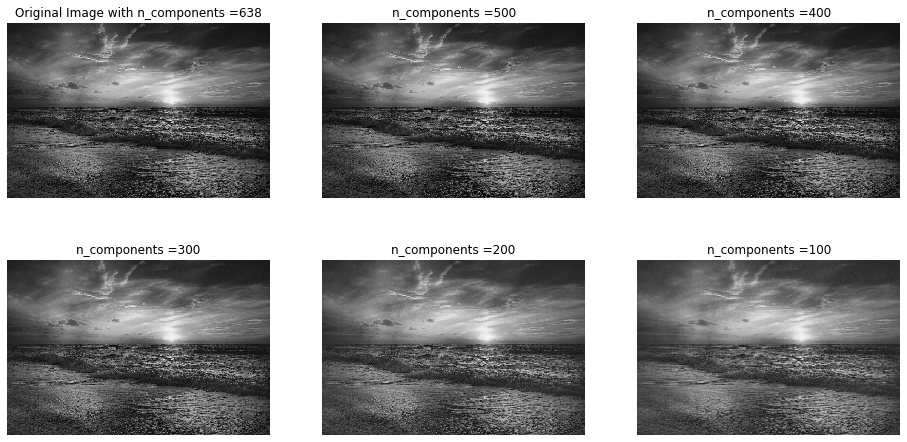

In [6]:
plt.figure(figsize = (16, 8))
for i in range(6):
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
  if(i  == 0):
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
  else:
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

In [0]:
#SVD for Spectral Clustering
#Import required functions and libraries
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# generate your data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

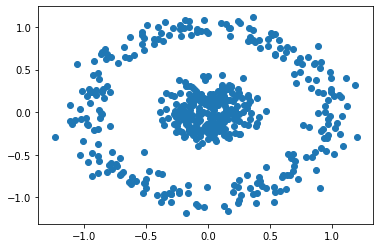

In [9]:
# plot your data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [10]:
# train and predict
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


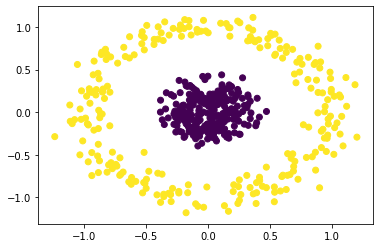

In [11]:
# plot clustered data
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)
plt.show()

In [0]:
#SVD in Numpy
#Import the libraries
import numpy as np
from numpy.linalg import svd

In [13]:
# define your matrix as a 2D numpy array
A = np.array([[4, 0], [3, -5]])
A

array([[ 4,  0],
       [ 3, -5]])

In [0]:
U, S, VT = svd(A)

In [15]:
print("Left Singular Vectors:")
print(U)

Left Singular Vectors:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]


In [16]:
print("Singular Values:") 
print(np.diag(S))

Singular Values:
[[6.32455532 0.        ]
 [0.         3.16227766]]


In [17]:
print("Right Singular Vectors:") 
print(VT)

Right Singular Vectors:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [18]:
# check that this is an exact decomposition
# @ is used for matrix multiplication in Py3
print(U @ np.diag(S) @ VT)

[[ 4.00000000e+00 -1.11271234e-15]
 [ 3.00000000e+00 -5.00000000e+00]]


In [0]:
#Truncated SVD 
import numpy as np
from sklearn.decomposition import TruncatedSVD

In [20]:
A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]


In [21]:
svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

Singular values:
[3. 3.]


In [22]:
print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Transformed Matrix after reducing to 2 features:
[[-1.13926225 -1.9240794 ]
 [-1.85319038  2.13674646]
 [ 2.06585744  0.85570617]]


In [0]:
#Randomized SVD
import numpy as np
from sklearn.utils.extmath import randomized_svd

In [0]:
A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

In [25]:
print("Left Singular Vectors:")
print(u)

Left Singular Vectors:
[[-0.25523068 -0.70029483]
 [ 0.94244607 -0.02615889]
 [-0.21599235  0.71337428]]


In [26]:
print("Singular Values:") 
print(np.diag(s))

Singular Values:
[[3. 0.]
 [0. 3.]]


In [27]:
print("Right Singular Vectors:") 
print(vt)

Right Singular Vectors:
[[ 0.71337428 -0.02615889 -0.70029483]
 [ 0.21599235 -0.94244607  0.25523068]]
